In [43]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import vdmlab as vdm
from analyze_maze import find_zones
from analyze_fields import get_unique_fields, categorize_fields

In [25]:
from load_data import get_pos, get_spikes, get_lfp
import info.r067d2 as info

In [26]:
pos = get_pos(info.pos_mat, info.pxl_to_cm)
lfp = get_lfp(info.good_swr[0])
spikes = get_spikes(info.spike_mat)

In [27]:
print(len(spikes))

51


In [8]:
times = info.task_times['phase1']

In [86]:
sliced_spikes = [spiketrain.time_slice(times.start, times.stop) for spiketrain in spikes]

In [87]:
sliced_pos = pos.time_slice(times.start, times.stop)

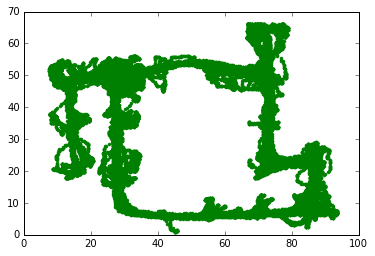

In [ ]:
plt.plot(sliced_pos.x, sliced_pos.y, 'g.')
plt.show()

In [ ]:
binsize = 3
xedges = np.arange(sliced_pos.x.min(), sliced_pos.x.max() + binsize, binsize)
yedges = np.arange(sliced_pos.y.min(), sliced_pos.y.max() + binsize, binsize)
tuning_curves = vdm.tuning_curve_2d(sliced_pos, sliced_spikes, xedges, yedges, gaussian_sigma=0.1)

In [ ]:
xx, yy = np.meshgrid(xedges, yedges)
for i, neuron in enumerate(tuning_curves[0:3]):
    pp = plt.pcolormesh(xx, yy, neuron, cmap='YlGn')
    plt.colorbar(pp)
    plt.axis('off')
    plt.plot()
    plt.close()

In [45]:
zones = find_zones(info)

field_thresh = 1.0
fields_tunings = categorize_fields(tuning_curves, zones, xedges, yedges, field_thresh=field_thresh)

In [85]:
fields_tunings['shortcut'].keys()

dict_keys([2, 3, 4, 5, 10, 12, 14, 16, 18, 19, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 37])

[]

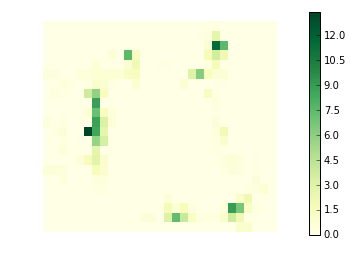

In [83]:
this_field = 2
pp = plt.pcolormesh(xx, yy, fields_tunings['shortcut'][this_field], cmap='YlGn')
plt.colorbar(pp)
plt.axis('off')
plt.plot()

In [72]:
unique_fields = dict()
unique_fields['u'] = get_unique_fields(fields_tunings['u'],
                                       fields_tunings['shortcut'],
                                       fields_tunings['novel'])
unique_fields['shortcut'] = get_unique_fields(fields_tunings['shortcut'],
                                              fields_tunings['novel'],
                                              fields_tunings['u'])
unique_fields['novel'] = get_unique_fields(fields_tunings['novel'],
                                           fields_tunings['u'],
                                           fields_tunings['shortcut'])

In [77]:
unique_fields['u'].keys()

dict_keys([26, 42, 36, 34, 7])

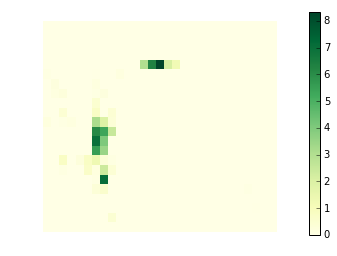

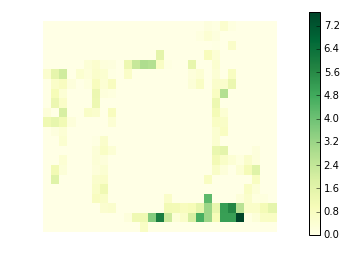

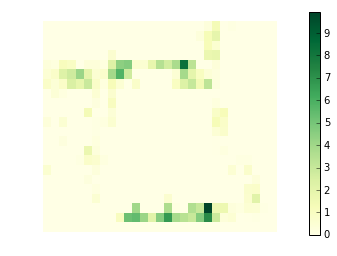

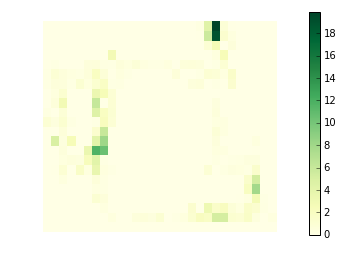

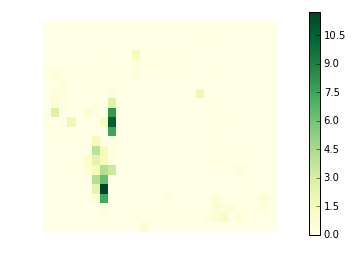

In [80]:
for key in unique_fields['u']:
    pp = plt.pcolormesh(xx, yy, unique_fields['u'][key], cmap='YlGn')
    plt.colorbar(pp)
    plt.axis('off')
    plt.show()